# Tutorial 1.2 - Stochastic Genetic Information Process

Here we examine a CME model of stochastic Genetic Information Process.

In this model, we include the transcription and translation of gene and mRNA together with degradation of both mRNA and protein.

The model presented here can be found in the classic article: [Analytical distributions for stochastic gene expression](https://www.pnas.org/doi/full/10.1073/pnas.0803850105).


In [2]:
# Import Standard Python Libraries
import os
import numpy as np

# Import jLM Libraries
import jLM.CME as CME
import jLM.units as units
import jLM.CMEPostProcessing as PostProcessing

# Enable plotting inline in the Jupyter notebook
%matplotlib inline

ModuleNotFoundError: No module named 'jLM.CME'

In [3]:
# Import Standard Python Libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Import pyLM Libraries
from pyLM import *
from pyLM.units import *
from pySTDLM import *
from pySTDLM.PostProcessing import *

# Enable plotting inline in the Jupyter notebook
%matplotlib inline

## Constants

Rates of reactions come from the [Cell, 2022](https://www.cell.com/cell/fulltext/S0092-8674(21)01488-4?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867421014884%3Fshowall%3Dtrue) paper's Whole Cell Model of DnaA coding gene (G_0001) at initial conditions.

Degradation rate of protein is calculated based on 25 hours' half life in [Maier et al, 2011](https://www.embopress.org/doi/full/10.1038/msb.2011.38).

In [4]:
# Constants
k_transcription  = 6.41e-4       # Transcription, s^-1
k_degra_mRNA = 2.59e-3     # degradation of mRNA, s^-1
k_translation = 7.2e-2        # translation, s^-1
k_degra_ptn = 7.70e-6      # degradation of protein, s^-1

## Define CME simulation

We begin by creating a [CMESimulation](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pyLM.CME.html#module-pyLM.CME) "object" that we call ```sim```. This object will include the definition of the whole stochastic simulation.

In [5]:
# Create our CME simulation object
sim = CME.CMESimulation(name='Gene Expression')

Next we define the chemical species with simulation. First. we specify the names of the chemical species.  Then we register these species with the simulation.  The [```defineSpecies()```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pyLM.CME.html#module-pyLM.CME) function can be called multiple times and will add any new names to the list of species.

In [6]:
# Define our chemical species
species = ['gene', 'mRNA', 'protein']
sim.defineSpecies(species)

Here we add reactions to the simulation. We use the [```addReaction()```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pyLM.CME.html#module-pyLM.CME) function that is a member of the ```CMESimulation``` object. We add a bimolecular association reaction and a unimolecular dissociation reaction. When more than one reactant is involved, the list of reactant names should be passed as a tuple as can be seen in the reactant of the association reaction. The rates in this command must be in units of molecules and seconds, for instance units of ```/molecule/sec``` for the association reaction.

In [7]:
# Add reactions to the simulation

sim.addReaction(reactant='gene', product=('gene','mRNA'), rate=k_transcription)
sim.addReaction(reactant='mRNA', product='', rate=k_degra_mRNA)
sim.addReaction(reactant='mRNA', product=('mRNA','protein'), rate=k_translation)
sim.addReaction(reactant='protein', product='', rate=k_degra_ptn)


Next, we add the initial particle counts to the simulation using the [```addParticles()```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pyLM.CME.html#module-pyLM.CME) function.

In [8]:
# Set our initial species counts
# Initial count of protein as 148 from proteomics
sim.addParticles(species='gene', count=1)
sim.addParticles(species='mRNA', count=1)
sim.addParticles(species='protein', count=148)

Finally, we define the simulation execution parameters. We have the simulation run for 6300 seconds of real time to cover the entire cell cyle.

The traces are recorded per 1 second.

Then we name the simulation output file and save the simulation definition to it.

In [9]:
# Simulation time is 6300 (entire cell life cycle of Minimal Cell).
writeInterval = 1
simtime = 6300

sim.setWriteInterval(writeInterval)
sim.setSimulationTime(simtime)

filename = "./T2.1-GeneticInformationProcess.lm"

os.system("rm -rf %s"%(filename)) # Remove previous LM file 

sim.save(filename)

In [10]:
# Print out the information of the system
sim

Specie,Particle ID,Initial Count
gene,1,1
mRNA,2,1
protein,3,148
Reaction,Rate,Units
gene ⟶ gene + mRNA,0.000641,s⁻¹
mRNA ⟶ ∅,0.00259,s⁻¹
mRNA ⟶ mRNA + protein,0.072,s⁻¹
protein ⟶ ∅,7.7e-06,s⁻¹


## Run Simulation

Change `reps` to simulate more cell replicates

In [11]:
# Run multiple replicates using the Gillespie solver
reps = 100

sim.run(filename=filename, method="lm::cme::GillespieDSolver", replicates=reps)

  0%|          | 0/100 [00:00<?, ?it/s]

2025-07-07 15:32:30) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:30) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 1 and bottom word 66517733
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 2 and bottom word 98633579
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.


  2%|2         | 2/100 [00:00<00:05, 16.82it/s]

2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 3 and bottom word 126254691
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 4 and bottom word 152051375
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00

  6%|6         | 6/100 [00:00<00:03, 28.81it/s]

2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 7 and bottom word 231775815
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 8 and bottom word 258133787
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00

 10%|#         | 10/100 [00:00<00:02, 32.62it/s]

2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 11 and bottom word 337574630
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 12 and bottom word 363856198
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.

 14%|#4        | 14/100 [00:00<00:02, 34.91it/s]

2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 15 and bottom word 441415616
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 16 and bottom word 468786844
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.

 18%|#8        | 18/100 [00:00<00:02, 35.92it/s]

2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 19 and bottom word 546803868
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 20 and bottom word 572340896
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.

 22%|##2       | 22/100 [00:00<00:02, 36.76it/s]

2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 23 and bottom word 651527037
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 24 and bottom word 678439402
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.

 26%|##6       | 26/100 [00:00<00:02, 36.57it/s]

2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 27 and bottom word 761602016
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 28 and bottom word 788759553
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.

 30%|###       | 30/100 [00:00<00:01, 36.35it/s]

2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 31 and bottom word 872901925
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 32 and bottom word 898566806
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.

 34%|###4      | 34/100 [00:00<00:01, 36.74it/s]

2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:31) Info: Seeding xorwow rng with top word 35 and bottom word 979748124
2025-07-07 15:32:31) Info: Data output thread finished.
2025-07-07 15:32:31) Info: Simulation file closed.
2025-07-07 15:32:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:31) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 36 and bottom word 4607559
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00

 38%|###8      | 38/100 [00:01<00:01, 37.30it/s]

2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 39 and bottom word 83197271
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 40 and bottom word 108570034
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.0

 42%|####2     | 42/100 [00:01<00:01, 37.61it/s]

2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 43 and bottom word 188207927
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 44 and bottom word 216332622
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.

 46%|####6     | 46/100 [00:01<00:01, 37.42it/s]

2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 47 and bottom word 295859943
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 48 and bottom word 323831607
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.

 50%|#####     | 50/100 [00:01<00:01, 37.76it/s]

2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 51 and bottom word 399400310
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 52 and bottom word 423766972
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.

 54%|#####4    | 54/100 [00:01<00:01, 38.29it/s]

2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 55 and bottom word 500116884
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 56 and bottom word 525605058
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.

 58%|#####8    | 58/100 [00:01<00:01, 37.68it/s]

2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 59 and bottom word 611254957
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 60 and bottom word 637253730
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.

 62%|######2   | 62/100 [00:01<00:01, 37.94it/s]

2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 63 and bottom word 714475166
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 64 and bottom word 740336636
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.

 66%|######6   | 66/100 [00:01<00:00, 38.13it/s]

2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 67 and bottom word 818529631
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 68 and bottom word 844778026
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.

 70%|#######   | 70/100 [00:01<00:00, 38.05it/s]

2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 71 and bottom word 923679468
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:32) Info: Data output thread running.
2025-07-07 15:32:32) Info: Seeding xorwow rng with top word 72 and bottom word 949026481
2025-07-07 15:32:32) Info: Data output thread finished.
2025-07-07 15:32:32) Info: Simulation file closed.
2025-07-07 15:32:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:32) Info: Assigning 1.00 processor(s) and 1.

 74%|#######4  | 74/100 [00:02<00:00, 37.80it/s]

2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 75 and bottom word 31495250
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 76 and bottom word 59530979
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00

 78%|#######8  | 78/100 [00:02<00:00, 37.01it/s]

2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 79 and bottom word 145655003
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 80 and bottom word 174850811
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.

 82%|########2 | 82/100 [00:02<00:00, 36.36it/s]

2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 83 and bottom word 258965239
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 84 and bottom word 285524412
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.

 86%|########6 | 86/100 [00:02<00:00, 36.87it/s]

2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 87 and bottom word 363811130
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 88 and bottom word 388729121
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.

 90%|######### | 90/100 [00:02<00:00, 37.57it/s]

2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 91 and bottom word 465511191
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 92 and bottom word 493119378
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.

 94%|#########3| 94/100 [00:02<00:00, 37.37it/s]

2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 95 and bottom word 574040132
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 96 and bottom word 599421825
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.

 98%|#########8| 98/100 [00:02<00:00, 37.33it/s]

2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 99 and bottom word 681248845
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.
2025-07-07 15:32:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2025-07-07 15:32:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2025-07-07 15:32:33) Info: Data output thread running.
2025-07-07 15:32:33) Info: Seeding xorwow rng with top word 100 and bottom word 708082467
2025-07-07 15:32:33) Info: Data output thread finished.
2025-07-07 15:32:33) Info: Simulation file closed.


100%|##########| 100/100 [00:02<00:00, 36.65it/s]


## Post-Processing

In [12]:
# Import Custom Analysis and Plotting Modules
import sys
sys.path.append('../analyze_scripts')
import custom_plot as plot

Go to `fig_dir` to see the plots

In [13]:
# Create folder to store plotted figures
fig_dir = './plots_GIP/'

if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

Serialize traces in LM file to a 3D Numpy Array with dimesions *(time, species, replicates)*.

In [14]:
fileHandle = PostProcessing.openLMFile(filename) # Create h5py file handle
timestep = PostProcessing.getTimesteps(fileHandle) # use PostProcessing to get the timesteps of the simulation

traces = np.zeros((len(timestep), len(sim.particleMap), reps)) # Initiate 3D array

# go to plot python script for detail
traces = plot.get_sim_data(traces, reps, filename) # Get 3D array

print('The size of the 3D trajectories is {0} with dimensions time, species, and replicates.'.format(np.shape(traces)))

The size of the 3D trajectories is (6301, 3, 100) with dimensions time, species, and replicates.


**Mean and Variance of mRNA and Protein**

Plot the population average and span of mRNA and protein abundances

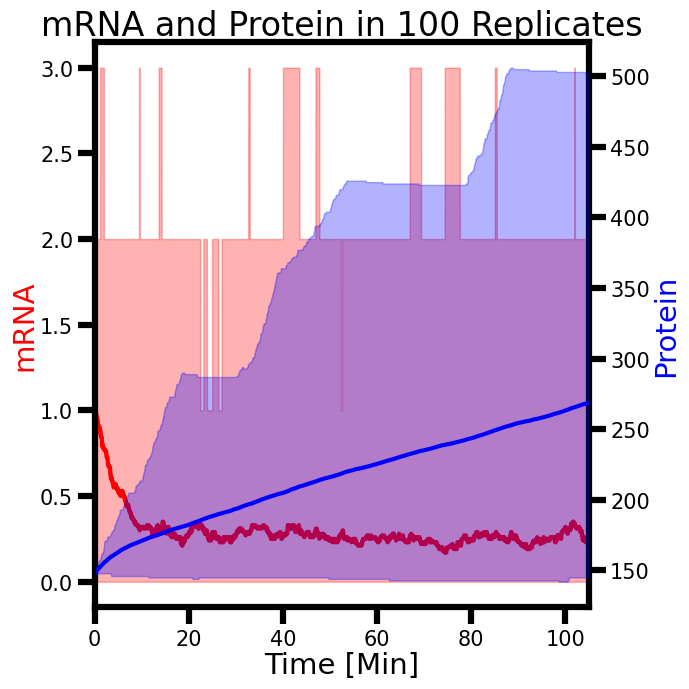

In [15]:
# mRNA and Protein in one plot
trace_mRNA = traces[:,1,:] # 2D array
trace_ptn = traces[:,2,:] # 2D array

time = timestep/60
xlabel = 'Time [Min]'
title = f'mRNA and Protein in {reps} Replicates'
percentile = [0,100] # Full span
fig_size = [7, 7]
fig_name = f'GIP_mRNA_Protein_{reps}Replicates'

left_data = [trace_mRNA]
left_colors = ['red']
left_ylabel = f'mRNA'
left_plots = ['range_avg']
left_ylabel_color = 'red'
left_legends = len(left_data)*['']

right_data = [trace_ptn]
right_colors = ['blue']
right_ylabel = f'Protein'
right_plots = ['range_avg']
right_ylabel_color = 'blue'
right_legends = len(left_data)*['']

plot.plot_time_dualAxes(fig_dir, fig_name, fig_size,
            time, xlabel, title, percentile,
            left_data, left_legends, left_colors, left_ylabel, left_plots, left_ylabel_color,
            right_data, right_legends, right_colors, right_ylabel, right_plots, right_ylabel_color,
            xlimit=[0,simtime/60], title_set=True, fonts_sizes=[21, 21, 24, 18],
            extension='.png', tick_setting=[12, 4.5, 15, 'out'], line_widths = [3, 4.5], legend_pos='best')

In [16]:
# mRNA
# trace_mRNA = traces[:,1,:]
# specie = 'mRNA'
# fig_name = 'GIP_{0}_{1}replicates.png'.format(specie, reps)
# fig_size = [7, 7] # Length by Height in inches
# time = timestep
# data_list=[trace_mRNA]
# legends = [specie]
# colors = ['red']
# xlabel='Time [s]'
# ylabel='Count'
# title=f'{specie} in {reps} Replicates'
# percentile = [0,100]

# plot.plot_time_ranges(fig_dir, fig_name, fig_size,
#                time, data_list, legends, colors, xlabel, ylabel, title,
#                percentile, plot_avg=True, plot_range=True, xlimit=[0, simtime],
#                title_set=True, fonts_sizes=[21, 21, 24, 18],
#                extension='.png', tick_setting=[12, 4.5, 15, 'out'], line_widths = [3, 4.5],
#                legend_pos='best')

In [17]:
# protein
# trace_ptn = traces[:,2,:]
# specie = 'protein'

# fig_name = 'GIP_{0}_{1}replicates.png'.format(specie, reps)
# fig_size = [7, 7] # Length by Height in inches
# time = timestep
# data_list=[trace_ptn]
# legends = [specie]
# colors = ['blue']
# xlabel='Time [s]'
# ylabel='Count'
# title=f'{specie} in {reps} Replicates'
# percentile = [0,100]

# plot.plot_time_ranges(fig_dir, fig_name, fig_size,
#                time, data_list, legends, colors, xlabel, ylabel, title,
#                percentile, plot_avg=True, plot_range=True, xlimit=[0, simtime],
#                title_set=True, fonts_sizes=[21, 21, 24, 18],
#                extension='.png', tick_setting=[12, 4.5, 15, 'out'], line_widths = [3, 4.5],
#                legend_pos='best')

**mRNA and protein in each single cell replicate individually**

The genetic information process occurrs in each single cell replicate. Now, let's look at the protein synthesis at single-cell level.

You will an increase/burst in protein count when there are mRNAs and the halting when no mRNA.

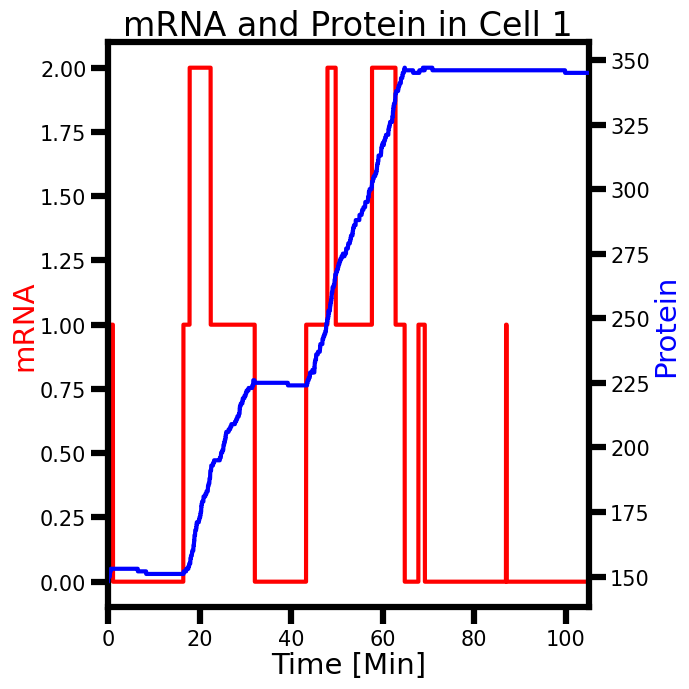

In [18]:
# mRNA and Protein in one plot
rep = 1 # Choose cell replicate `rep`
trace_mRNA = traces[:,1,:] # 2D array
trace_ptn = traces[:,2,:] # 2D array

time = timestep/60
xlabel = 'Time [Min]'
title = f'mRNA and Protein in Cell {rep}'
percentile = [0,100] # Full span
fig_size = [7, 7]
fig_name = f'GIP_mRNA_Protein_Cell{rep}'

left_data = [trace_mRNA[:,rep-1]]
left_colors = ['red']
left_ylabel = f'mRNA'
left_plots = ['single']
left_ylabel_color = 'red'
left_legends = len(left_data)*['']

right_data = [trace_ptn[:,rep-1]]
right_colors = ['blue']
right_ylabel = f'Protein'
right_plots = ['single']
right_ylabel_color = 'blue'
right_legends = len(left_data)*['']

plot.plot_time_dualAxes(fig_dir, fig_name, fig_size,
            time, xlabel, title, percentile,
            left_data, left_legends, left_colors, left_ylabel, left_plots, left_ylabel_color,
            right_data, right_legends, right_colors, right_ylabel, right_plots, right_ylabel_color,
            xlimit=[0,simtime/60], title_set=True, fonts_sizes=[21, 21, 24, 18],
            extension='.png', tick_setting=[12, 4.5, 15, 'out'], line_widths = [3, 4.5], legend_pos='best')

**Distribution of Protein at the end of the cell cycle**

Increase the `reps` from 10 to 100 after restart the kernel, and redo the histogram

Hist ./plots_GIP/GIP_Proteins_CycleEnd_100replicates.png : Min 145.00, Mean 268.51, Median 251.50, Max 501.00


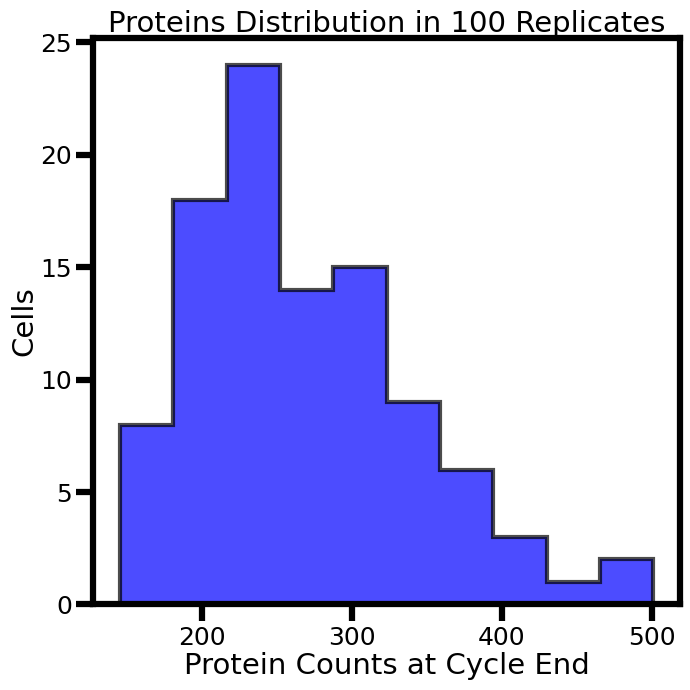

In [22]:
# Protein Distribution
ptn_endcycle = trace_ptn[-1,:] # 1D array

fig_size=[7, 7]
fig_name=f'GIP_Proteins_CycleEnd_{reps}replicates'
data_list=[ptn_endcycle]
legends=['']
colors = ['blue']
xlabel='Protein Counts at Cycle End'
ylabel='Cells'
title=f'Proteins Distribution in {reps} Replicates'
bins=min(int(reps/2), 10)

plot.plot_hists(fig_dir, fig_name, fig_size,
            data_list, legends, colors, xlabel, ylabel, title, bins,
            mean_median=[False, False],
            title_set=True, fonts_sizes=[21, 21, 21, 18],
            extension='.png', range=None, 
            tick_setting=[12, 4.5, 18, 'out'], line_widths = [3, 4.5], legend_pos='upper left')